In [27]:
import random, numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [46]:
alphap = 2
probp = 0.75
expon = 2 * alphap - 1
ensemble_sizep = 50_0
min_iterationp = 100_000
bin_sizep = 0.001

## Defining directory

In [47]:
dir_data = "../../data/alpha{}/".format(alphap)
dir_fig  ="../../figures/alpha{}/".format(alphap)


## While testing
dir_data = "../../data/temp/alpha{}/".format(alphap)
dir_fig  ="../../figures/temp/alpha{}/".format(alphap)

# create directory if it does not exists
for dir_name in [dir_data, dir_fig]:
    if not os.path.isdir(dir_name):
        os.mkdir(dir_name)
        print("directory ", dir_name, " is created")
    else:
        print("directory ", dir_name, " exists")

directory  ../../data/temp/alpha2/  is created
directory  ../../figures/temp/alpha2/  is created


In [48]:
figure_name = dir_fig + "pn_data_coll_alpha_3.pdf"

In [49]:
%run ../../stochastic_fractal_m.py

ROOT_DIR  /home/shahnoor/projects/Stochastic-Fractal/main_jupyter


## Simulation using class

In [50]:
stochastic_frag = TrueLengths(alpha=alphap, probability=probp)

kwargs  {'alpha': 2, 'probability': 0.75}
Turning on logging


In [51]:
# lengths_enselbme = stochastic_frag.run_ensemble(ensemble_size, total_iteration)

In [52]:
ana_soln = AnalyticSoln()

## Other functions

In [53]:
def bin_maker(max_value, bin_number):
    bin_size = max_value/bin_number
    bins = [0.]
    for i in range(bin_number):
        bin_edge = (i+1)*bin_size
        bins.append(bin_edge)
        pass
    return bins

In [54]:
def histrogram_data(data, bin_size = bin_sizep):
    bin_number = int((np.max(data) - np.min(data))//bin_size) + 1
    y, x = np.histogram(data, bins = bin_number)
    return x[1:], y

## fitting data

$\phi \equiv \text{simulation}$
$\phi^{(th)} \equiv \text{theoritical or analytical}$

$$cost = \sum_t \sum_i (b*\phi_{i t} - \phi_{i t}^{(th)})^2 \$$

we need to minimize $cost$. We get the value of $b$ as

$$b = \frac{\sum_t \sum_i \phi_{i t} \phi_{i t}^{(th)}}{\sum_t \sum_i \phi_{i t}^2}$$

In [55]:
def fitting_parameter(given_array,ref_array):
    a1 = np.multiply(given_array,ref_array)
    a2 = np.multiply(given_array,given_array)
    a1_sum = np.sum(a1)
    a2_sum = np.sum(a2)
    return a1_sum, a2_sum

In [56]:
def plot_data(total_iteration):
    df = ana_soln.find_df(alphap,probp)
    
    # doing the simulation here
    ens_data = stochastic_frag.run_ensemble(ensemble_sizep, total_iteration)  # from class
    x,y = histrogram_data(ens_data)
    xi = x*total_iteration**(1/(2*alphap-1))
    phi = y/(total_iteration**((1+df)/(2*alphap-1)))
    phi_analytic = ana_soln.phi_list(alphap,probp,xi)  # from class
    a1_sum, a2_sum = fitting_parameter(phi, phi_analytic)
    return xi, phi, a1_sum, a2_sum

In [57]:
data_dict = {}
a1_sum, a2_sum = 0,0
for i in range(3):
    time_t = min_iterationp*(i+1)
    xi, phi, a1, a2 = plot_data(time_t)
    data_dict[time_t]=[xi,phi]
    a1_sum += a1
    a2_sum += a2
    
for i in range(3):
    time_t = min_iterationp*(i+1)
    data_dict[time_t][1]*=(a1_sum/a2_sum)

realization  1  . Time spent  0.1260833740234375  sec
realization  6  . Time spent  0.6162509918212891  sec
realization  11  . Time spent  0.520552396774292  sec
realization  16  . Time spent  0.5432021617889404  sec
realization  21  . Time spent  0.5650725364685059  sec
realization  26  . Time spent  0.5179252624511719  sec
realization  31  . Time spent  0.5984005928039551  sec
realization  36  . Time spent  0.63075852394104  sec
realization  41  . Time spent  0.5823814868927002  sec
realization  46  . Time spent  0.6066796779632568  sec
realization  51  . Time spent  0.5281515121459961  sec
realization  56  . Time spent  0.5702276229858398  sec
realization  61  . Time spent  0.5574274063110352  sec
realization  66  . Time spent  0.5555651187896729  sec
realization  71  . Time spent  0.5601582527160645  sec
realization  76  . Time spent  0.5171728134155273  sec
realization  81  . Time spent  0.49877309799194336  sec
realization  86  . Time spent  0.5864472389221191  sec
realization  9

realization  236  . Time spent  1.046492576599121  sec
realization  241  . Time spent  1.0339100360870361  sec
realization  246  . Time spent  1.1019222736358643  sec
realization  251  . Time spent  1.057675838470459  sec
realization  256  . Time spent  1.2044258117675781  sec
realization  261  . Time spent  1.1510694026947021  sec
realization  266  . Time spent  1.1634016036987305  sec
realization  271  . Time spent  1.1573660373687744  sec
realization  276  . Time spent  1.4211845397949219  sec
realization  281  . Time spent  2.8100879192352295  sec
realization  286  . Time spent  1.6157634258270264  sec
realization  291  . Time spent  1.5229344367980957  sec
realization  296  . Time spent  1.6086852550506592  sec
realization  301  . Time spent  2.0729715824127197  sec
realization  306  . Time spent  1.582947015762329  sec
realization  311  . Time spent  1.4047377109527588  sec
realization  316  . Time spent  1.143362045288086  sec
realization  321  . Time spent  1.7113566398620605  

realization  471  . Time spent  1.5498602390289307  sec
realization  476  . Time spent  1.5689921379089355  sec
realization  481  . Time spent  1.5512645244598389  sec
realization  486  . Time spent  1.6939857006072998  sec
realization  491  . Time spent  1.4877710342407227  sec
realization  496  . Time spent  1.4863090515136719  sec
Total time spent  159.47592759132385  sec


In [58]:
data_dict.keys()

dict_keys([100000, 200000, 300000])

### Saving data for later use

In [59]:
signature = 'data_collapse_alpha_{}_t_{}k'
for time_t in data_dict.keys():
    x,y = data_dict[time_t]
    file_name = signature.format(alphap, int(time_t//1000))
    np.savetxt(dir_data+file_name,np.c_[x,y])

## Plotting

../../figures/temp/alpha2/pn_data_coll_alpha_3.pdf


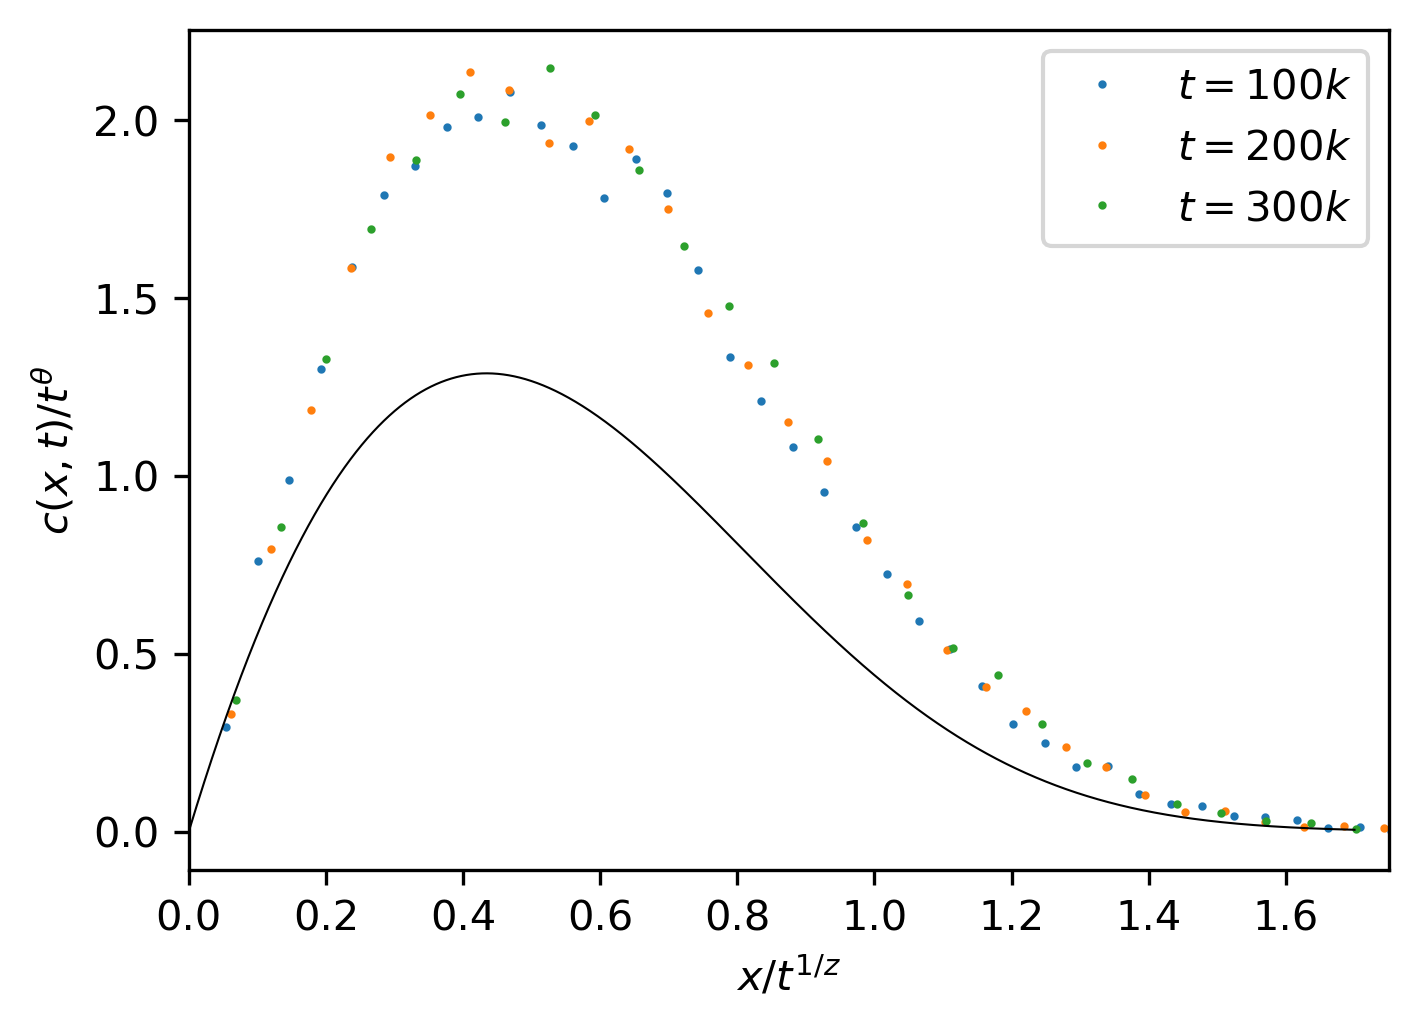

In [60]:
fig, axes = plt.subplots(1,1,figsize = (5,3.5),dpi = 300)

for i in range(3):
    time_t = min_iterationp*(i+1)
    x,y = data_dict[time_t]
    plt.plot(x, y,"o", markersize=1,label=r"$t={}k$".format(str(int(time_t//1000))))

xi_th = np.linspace(0,1.7,8501)
xis, phi_th = ana_soln.phi_list(alphap,probp,xi_th)  # from class
plt.plot(xi_th, phi_th,color='black',linewidth=0.5)

plt.legend(loc=1)
plt.xlabel(r"$x/t^{1/z}$")
plt.ylabel(r"$c(x,t)/t^\theta$")
plt.xlim([0, 1.75])
axes.set_position([0.15, 0.15, 0.8, 0.8])

print(figure_name)
# plt.savefig(figure_name)